In [1]:
import tensorflow as tf

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 6s 1us/step


AttributeError: 'tuple' object has no attribute 'shape'

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[: -5000], y_train_full[: -5000]
X_valid, y_valid = X_train_full[-5000: ], y_train_full[-5000: ]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [9]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

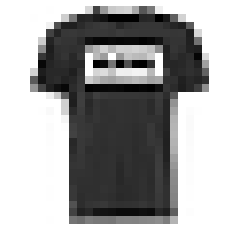

In [16]:
plt.imshow(X_train[1], cmap='binary')
plt.axis('off')
plt.show()

In [13]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[1]]

'T-shirt/top'

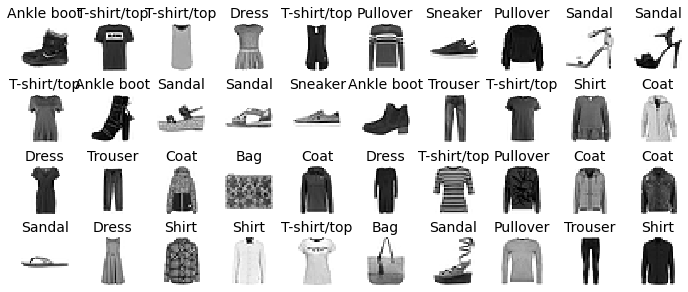

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [21]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
model.layers

In [26]:
model.layers[1].name

'dense'

In [27]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.02578461,  0.03489724, -0.02851282, ..., -0.06277199,
        -0.02335965,  0.05259798],
       [ 0.03731862, -0.06733   ,  0.01346646, ..., -0.05310941,
        -0.04430424, -0.01300543],
       [ 0.05184992, -0.06654097,  0.04570765, ...,  0.00292666,
         0.00426019,  0.03788174],
       ...,
       [-0.04750682,  0.05132636, -0.05195625, ...,  0.04666395,
        -0.04372289, -0.04931214],
       [ 0.07057041,  0.05317289, -0.03841746, ..., -0.03766825,
         0.00708764,  0.00899971],
       [-0.04610638, -0.03373974, -0.07065118, ..., -0.05639117,
        -0.00778181, -0.05116933]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 13s 7ms/step - loss: 2.2997 - accuracy: 0.1413 - val_loss: 2.2989 - val_accuracy: 0.1992
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2986 - accuracy: 0.1540 - val_loss: 2.2977 - val_accuracy: 0.2840
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 2.2973 - accuracy: 0.1694 - val_loss: 2.2964 - val_accuracy: 0.0984
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 2.2958 - accuracy: 0.1690 - val_loss: 2.2946 - val_accuracy: 0.1538
Epoch 5/20
1719/1719 [==============================] - 11s 6ms/step - loss: 2.2939 - accuracy: 0.2036 - val_loss: 2.2929 - val_accuracy: 0.3370
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 2.2915 - accuracy: 0.2132 - val_loss: 2.2903 - val_accuracy: 0.1576
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 2.2880 - accuracy: 0.2086 - val_loss: 2.2857 - val_accur

In [ ]:
model.save('image_model.h5')
model = tf.kerad.load_model('image_model.h5')

In [44]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

from sklearn.linear_model import Perceptron

AssertionError: 

In [40]:
housing = fetch_california_housing()
X_train_full, X_test,  y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid,  y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

NameError: name 'fetch_california_housing' is not defined

### Callbacks

In [ ]:
checkpoint_cback = tf.keras.callbacks.ModelCheckpoint('image_model.h5')
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), calbacks=[checkpoint_cback, early_stop])